# 20240921
1. 최초시작.


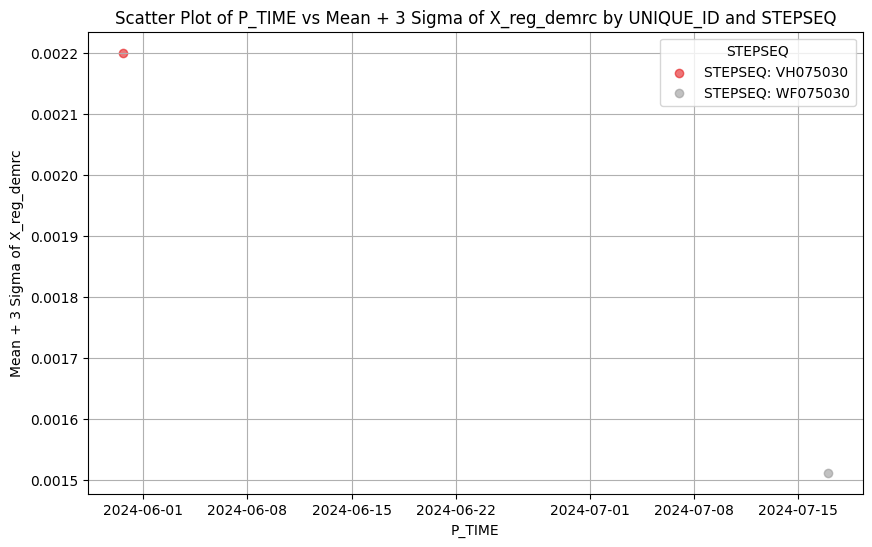

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# 엑셀 파일을 읽어옵니다.
file_path = 'output.xlsx'  # 여기에 파일 경로를 입력하세요
df = pd.read_excel(file_path, sheet_name='Ideal TROCS')



# UNIQUE_ID별로 X_reg_demrc의 mean과 std(표준편차)를 계산하고, mean + 3 sigma 값을 구합니다.
grouped_data = df.groupby('UNIQUE_ID').agg(
    mean_X_reg=('X_reg_demrc', 'mean'),
    std_X_reg=('X_reg_demrc', 'std'),
    P_TIME=('P_TIME', 'first'),
    STEPSEQ=('STEPSEQ', 'first')
)
grouped_data['mean_plus_3sigma'] = grouped_data['mean_X_reg'] + 3 * grouped_data['std_X_reg']

# STEPSEQ별로 색상을 자동으로 설정합니다.
unique_stepseq = grouped_data['STEPSEQ'].unique()
colors = plt.cm.get_cmap('Set1', len(unique_stepseq))  # Set1은 대비가 강한 색상들로 구성됨.

# Scatter plot을 그립니다.
plt.figure(figsize=(10, 6))

# STEPSEQ별로 색상을 구분하여 플로팅
for i, stepseq in enumerate(unique_stepseq):
    subset = grouped_data[grouped_data['STEPSEQ'] == stepseq]
    plt.scatter(pd.to_datetime(subset['P_TIME']), subset['mean_plus_3sigma'], 
                color=colors(i), label=f'STEPSEQ: {stepseq}', alpha=0.6)

# 그래프 제목과 축 라벨을 설정합니다.
plt.title('Scatter Plot of P_TIME vs Mean + 3 Sigma of X_reg_demrc by UNIQUE_ID and STEPSEQ')
plt.xlabel('P_TIME')
plt.ylabel('Mean + 3 Sigma of X_reg_demrc')
plt.grid(True)
plt.legend(title='STEPSEQ')

# 그래프를 보여줍니다.
plt.show()


